<a href="https://colab.research.google.com/github/A-Kutscher/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Amber_Kutscher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Amber Kutscher

# Introduction

<center><img src="https://media-exp1.licdn.com/dms/image/C4D1BAQFHWOY552RTcg/company-background_10000/0/1519796859327?e=2147483647&v=beta&t=4IrZoehp62WxDh6nnNTC5_OBS_J7ra0WdY7tq5nWV2M" width=800px>

<a href="https://www.kaggle.com/code/nitinchoudhary012/big-mart-sales-analysis">Image Source</a></center>

We have been hired by the executive team at Big Mart to conduct a comprehensive analysis of historical product sales across multiple Big Mart outlets. Our primary objective is to develop robust sales forecasts for the year 2023. To achieve this, we are tasked with leveraging data from 1559 unique products distributed among 10 stores located in different cities. Additionally, our analysis will help Big Mart identify top-performing items that contribute significantly to their revenue generation.

<center>We will be following the CRISP-DM workflow for our analysis.  

<center>
<img src="https://raw.githubusercontent.com/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/main/Images/CRISP-DM.png" width=600px>


<a href="https://www.datascience-pm.com/crisp-dm-2">Image Source</a></center>

## Table of Contents

# Phase 1) Business Understanding

**Our stakeholders are:**
- Big Mart executives and decision-makers.

**Their primary goal is:**
- to identify a predictive model that, given the available data, can anticipate the target variable with accuracy and reliability. The stakeholder wants to maximize processes, resource allocation, and overall business performance by making data-driven decisions and gaining insightful knowledge. An ideal model should be able to reliably forecast outcomes for application in real-world scenarios and have high adaptability to new and unseen data.

**They plan to:**
- use the analysis to shape the overall strategy of the company, prioritize key initiatives, and guide long-term planning in order to maximize profit.

**What do they need/expect?**
- valuable insights and practical recommendations that can guide them in making specific modifications to boost their overall sales performance.


# Phase 2) Data Understanding

## 2.1) What data have we been provided with?

### Link to Original Dataset
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

### Data Dictionary

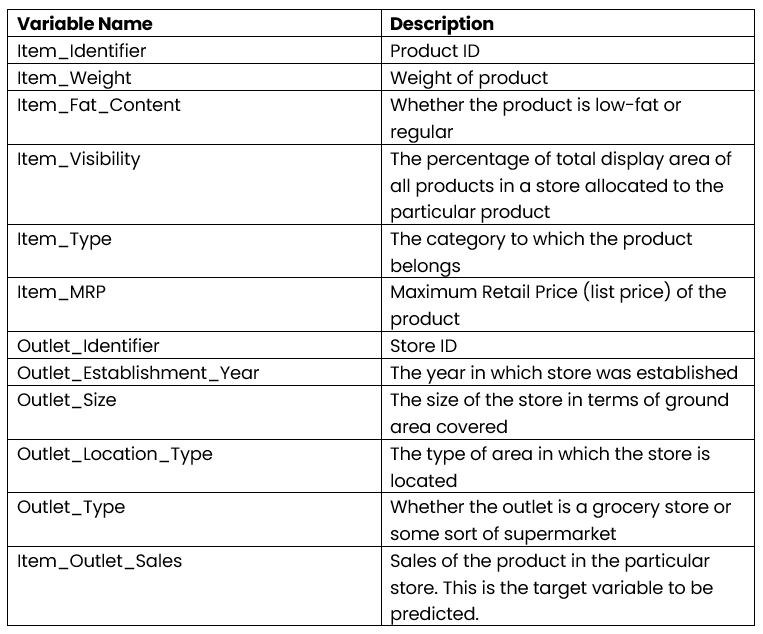

### Imports

In [1]:
# Import Standard Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 100)

### Load and Inspect Data

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Save a filepath and load the data under a new name
df_sales_predictions = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(df_sales_predictions)

In [4]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Display the last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## **2.2) What information is included in the data?**

In [6]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- The datafile has 8523 rows and 12 columns.
- There is a mixture of datatypes:
  - 4 float
  - 1 interger
  - 7 object

### Inspecting Object Columns for Numeric Features

In [7]:
# Preview all object columns
df.select_dtypes("object").head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


- **Are there any object columns that should be converted to numeric?**
  - No.

## **2.3) How clean is the data?**

### Are there duplicates that should be dropped?

In [8]:
# Check for duplicates
df.duplicated().sum()

0

#### Duplicate Values Observation:
- There are zero (0) duplicates in this dataset.

### Are there any missing values?

In [9]:
# Check for any missing values for all columns and save as a variable
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Use the above resuolts to find the percentage (%) of the missing data
null_perent = null_sums/len(df)*100
null_perent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### Null Value Observations:
  - There are **1463** missing values in the **Item_Weight** column. This equates to **17.17%**.
  - There are **2410** missing values in the **Outlet_Size** column. This equates to **28.28%**.

#### Address the missing values by using a placeholder value.

In [11]:
# Create a list of categorical column names
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
# Use the aforementioned list to fill null values with MISSING
df[cat_cols] = df[cat_cols].fillna("MISSING")

In [13]:
# Create a list of numeric column names
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
# Use the aforementioned list to fill null values with -1
df[num_cols] = df[num_cols].fillna(-1)

#### Confirm that there are no missing values after addressing them.

In [15]:
# Confirm that there are no more nulls
null_counts = df.isna()
null_counts

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


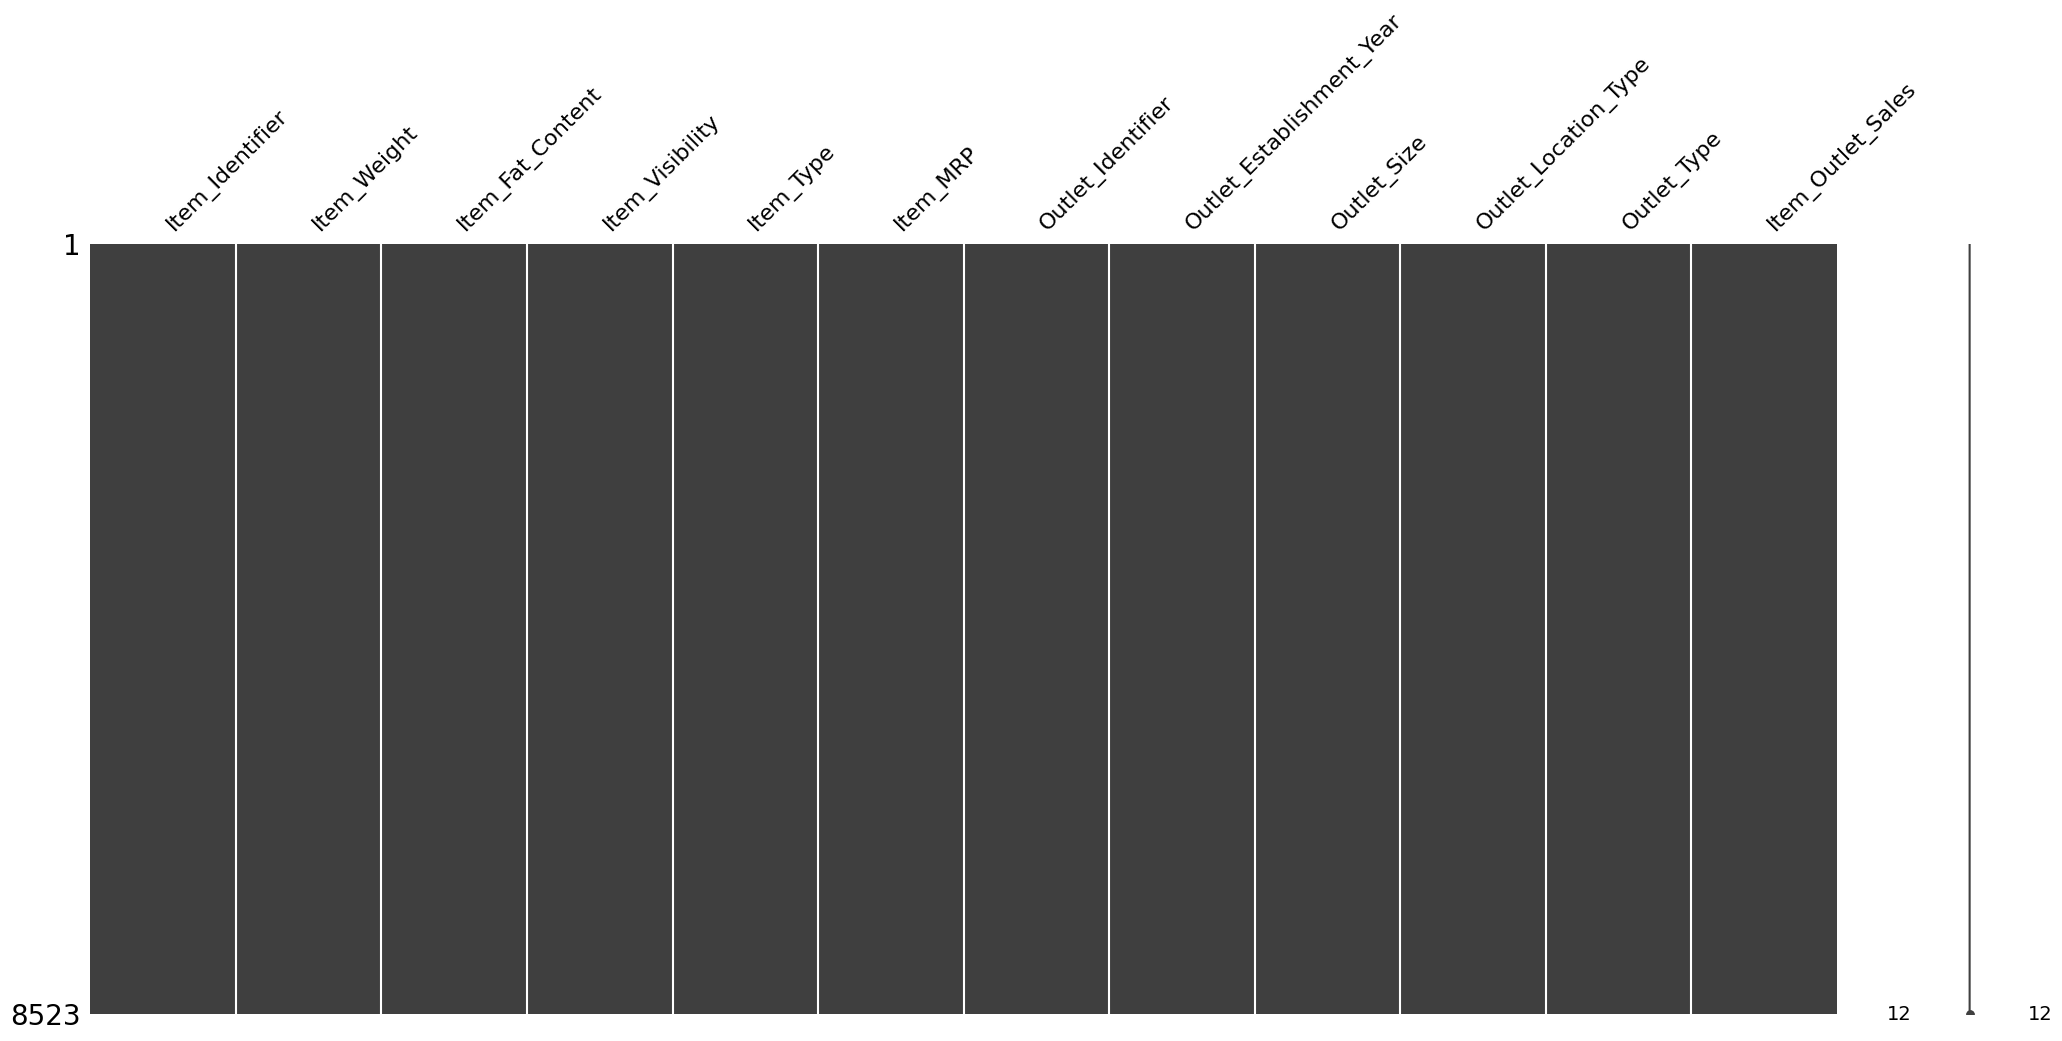

In [16]:
# Visualize the missing values using the missingno package's matrix plot
msno.matrix(df);

### Are there any features with inconsistent values?

#### Checking Object Features for Inconsistencies

In [17]:
# Create a list of object columns
object_cols = df.select_dtypes(include="object").columns
object_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
# Check the nunique for just the object columns
object_cols_nunique = df[object_cols].nunique()
object_cols_nunique

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [19]:
# Look over each categorical column to identify any values that need to be replaced
print(df['Item_Fat_Content'].unique())
print('\n')
print(df['Item_Type'].unique())
print('\n')
print(df['Outlet_Identifier'].unique())
print('\n')
print(df['Outlet_Size'].unique())
print('\n')
print(df['Outlet_Location_Type'].unique())
print('\n')
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


['Medium' 'MISSING' 'High' 'Small']


['Tier 1' 'Tier 3' 'Tier 2']


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


##### Notes on Categorical Feature Inconsistencies

- **Item_Fat_Content**:
  - There were some values in the Item_Fat Content column that had "low fat" or "LF" instead of "Low Fat" and "reg" instead of "Regular".
  - We will replace the incorrect values with "Low Fat" and "Regular".

- Note that out of the seven (7) categorical columns remaining:
  - Six (6) columns have a small number of categories. (Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type).
  - One (1) column has over one-hundred (100) categories. (Item_Identifier).
- The Item_Identifier column may be important for identification purposes, so we will keep it in the dataset for the time being.

In [20]:
# Fix values in Item Fat Content column to be cohesive
df.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}, inplace=True)
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


#### Checking Numeric Columns for Inconsistencies

In [21]:
# Find the summary statistics for any numerical columns
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [22]:
# Use stats.loc to find the min, mean, and max
stats = df.describe()
stats.loc[['min', 'mean', 'max']].round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.00,0.00,31.29,1985.00,33.29
mean,10.48,0.07,140.99,1997.83,2181.29
max,21.35,0.33,266.89,2009.00,13086.96


##### **Notes on Numeric Feature Inconsistencies**

- **Item_Weight**: has a minimum value of -1.
  - This may be a placeholder value.
  - We should consider replacing the -1 values with 0, which we will decide after visualizing the features.

### Do any features need to be combined or separated?

- There are zero (0) features that need to be combined or separated.

## Exploratory Data Analysis
Phase 2.4 of CRISP-DM: Explore Each Feature

In [23]:
# Import Modeling Tools
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

# Set global scikit-learn configuration
from sklearn import set_config
set_config(transform_output='pandas')

## **2.4) What do the features look like and how are they related?**

Create exploratory visuals that might help to understand, explain, or model the data.

### Define EDA Functions

In [24]:
# Get list of object columns
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [25]:
# Get list of numeric columns
num_cols = df.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Create histograms to view the distributions of numerical features in the dataset.

In [27]:
# Select numerical columns
print(num_cols)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


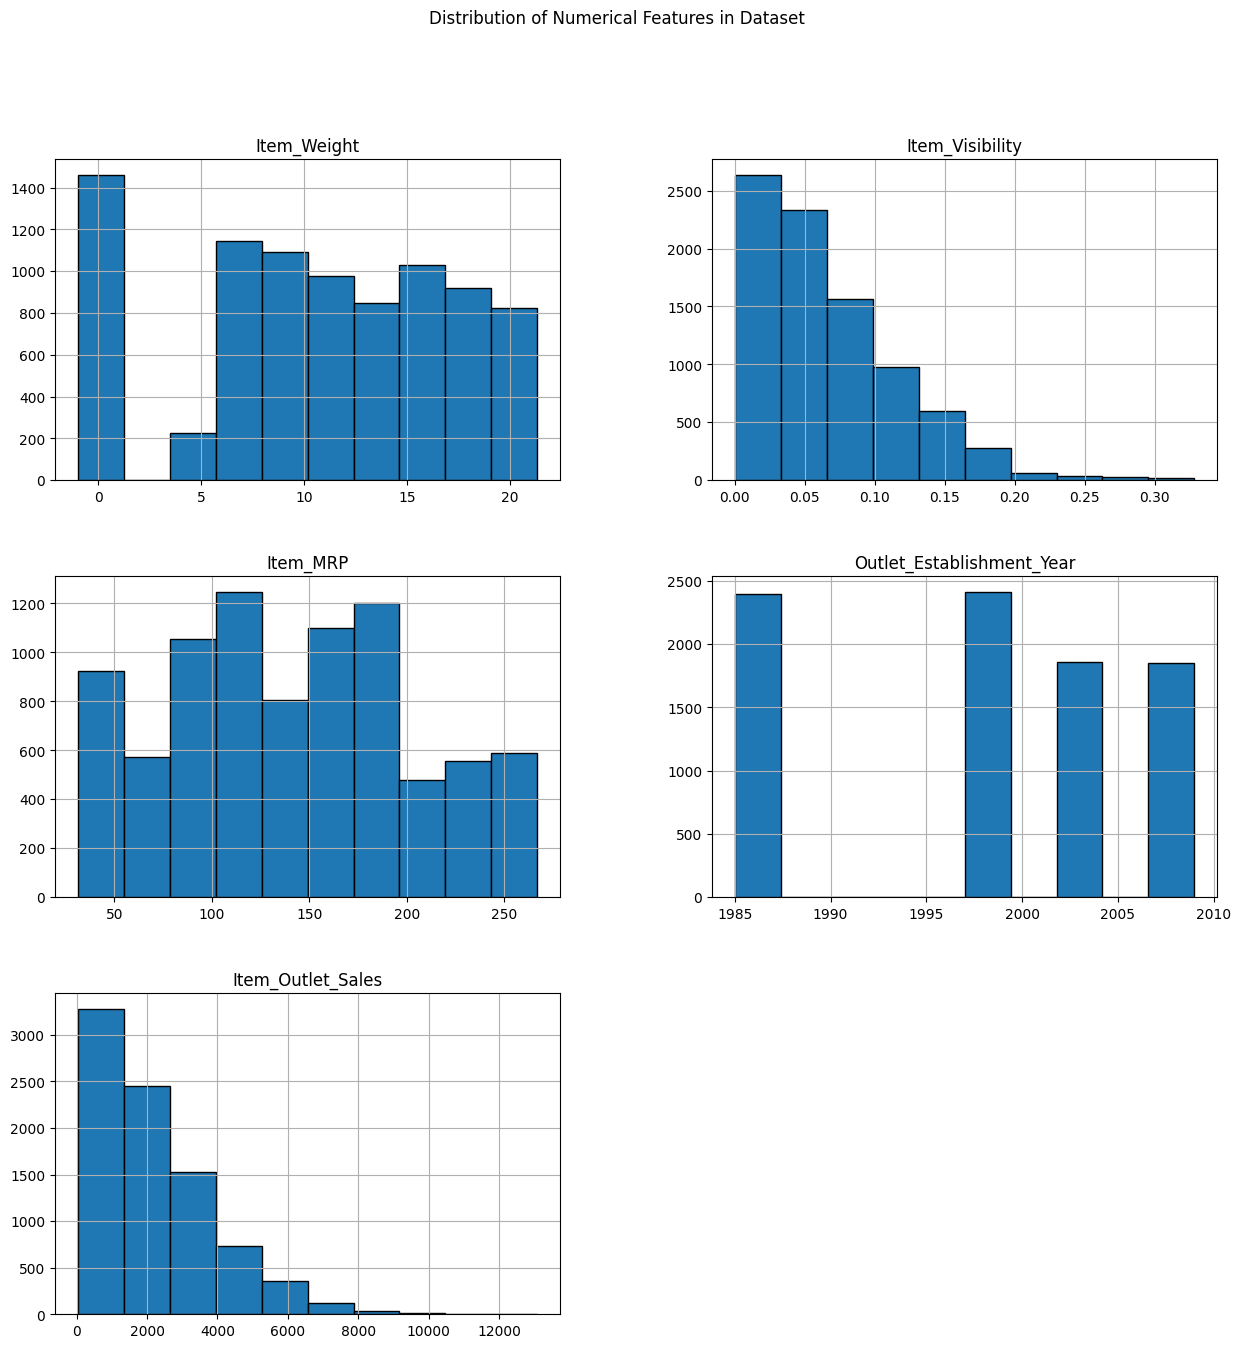

In [28]:
# Create a histogram to view the distributions of numerical features in the dataset
df[num_cols].hist(bins=10, figsize=(15,15), edgecolor='black');
plt.suptitle('Distribution of Numerical Features in Dataset');

### Create boxplots to view statistical summaries of numerical features in the dataset.

In [29]:
# Obtain the summary stats for all of the numerical features
summary_stats = df[num_cols].describe()
summary_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


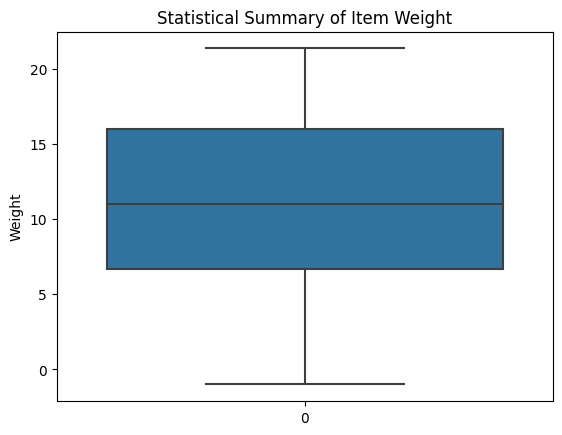

In [30]:
# Create boxplots to view the statistical summary for Item_Weight
fig, ax = plt.subplots()
data_weight = df["Item_Weight"]
ax = sns.boxplot(data_weight)
ax.set_ylabel('Weight')
ax.set_title('Statistical Summary of Item Weight');

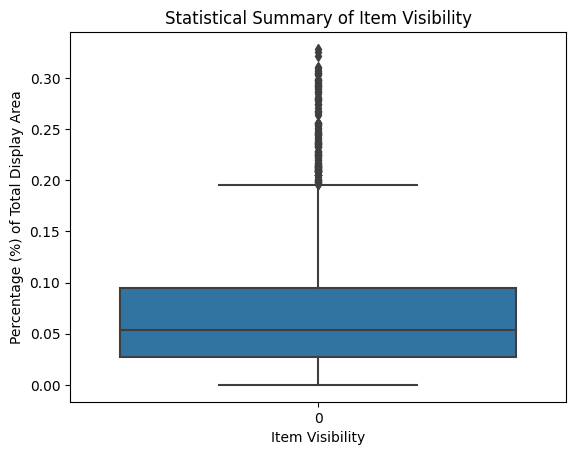

In [31]:
# Create boxplots to view the statistical summary for Item_Visibility
fig, ax = plt.subplots()
data_vis = df["Item_Visibility"]
ax = sns.boxplot(data_vis)
ax.set_ylabel('Percentage (%) of Total Display Area')
ax.set_xlabel('Item Visibility')
ax.set_title('Statistical Summary of Item Visibility');

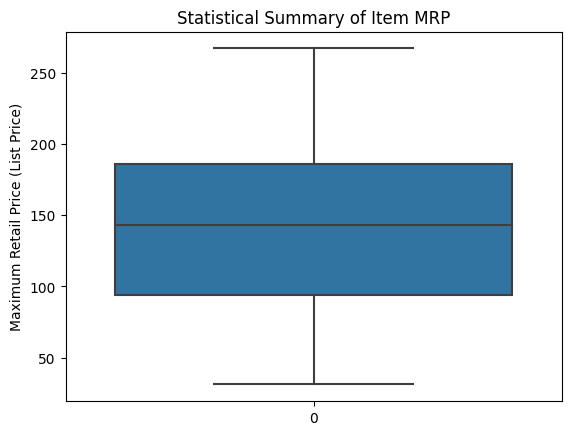

In [32]:
# Create boxplots to view the statistical summary for Item_MRP
fig, ax = plt.subplots()
data_mrp = df["Item_MRP"]
ax = sns.boxplot(data_mrp)
ax.set_ylabel('Maximum Retail Price (List Price)')
ax.set_title('Statistical Summary of Item MRP');

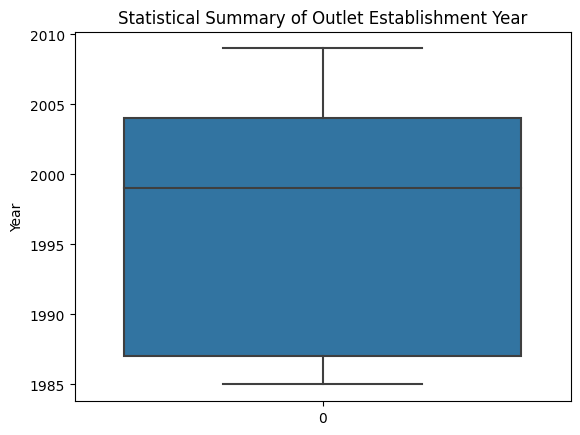

In [33]:
# Create boxplots to view the statistical summary for Outlet_Establishment_Year
fig, ax = plt.subplots()
data_year = df["Outlet_Establishment_Year"]
ax = sns.boxplot(data_year)
ax.set_ylabel('Year')
ax.set_title('Statistical Summary of Outlet Establishment Year');

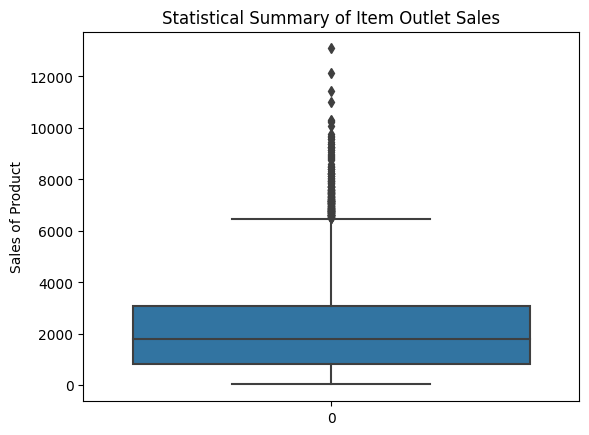

In [34]:
# Create boxplots to view the statistical summary for Item_Outlet_Sales
fig, ax = plt.subplots()
data_sales = df["Item_Outlet_Sales"]
ax = sns.boxplot(data_sales)
ax.set_ylabel('Sales of Product')
ax.set_title('Statistical Summary of Item Outlet Sales');

### Create countplots to view the frequency of each class of categorial features in the dataset.

In [35]:
# Check the updated nunique for just the object columns
updated_object_cols_nunique = df[object_cols].nunique()
updated_object_cols_nunique

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [36]:
# Call unique categorical columns, minus (-) extreme nunique column
# Item_Identifier as that column has too many frequencies to plot
cat_features = [col for col in cat_cols if col != 'Item_Identifier']
print(cat_features)

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


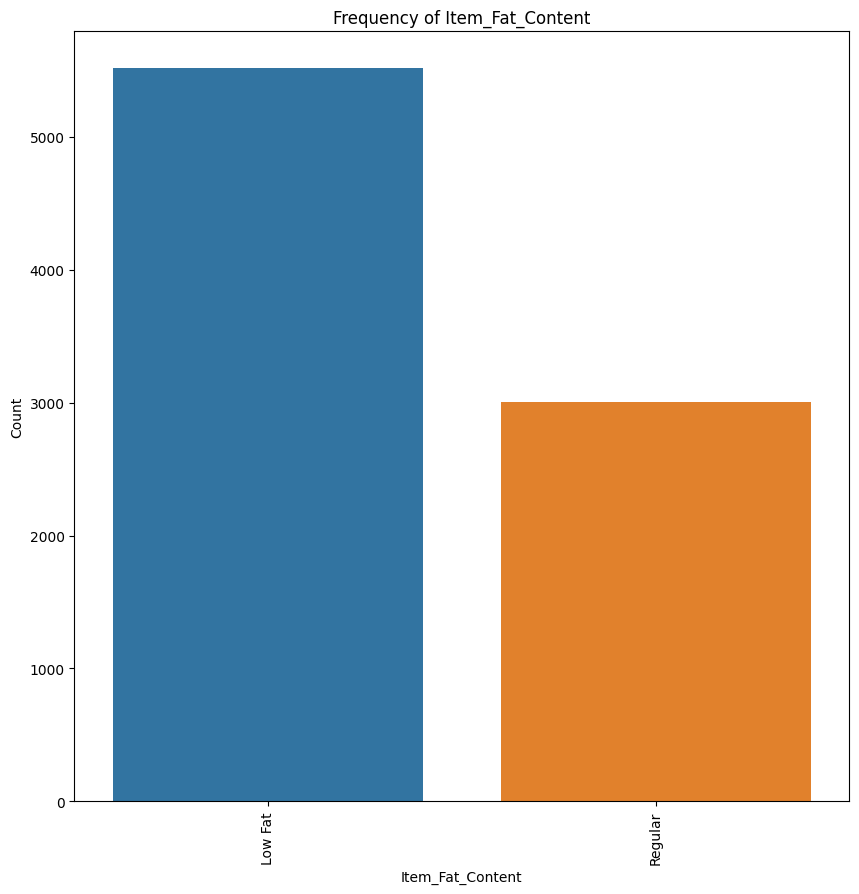

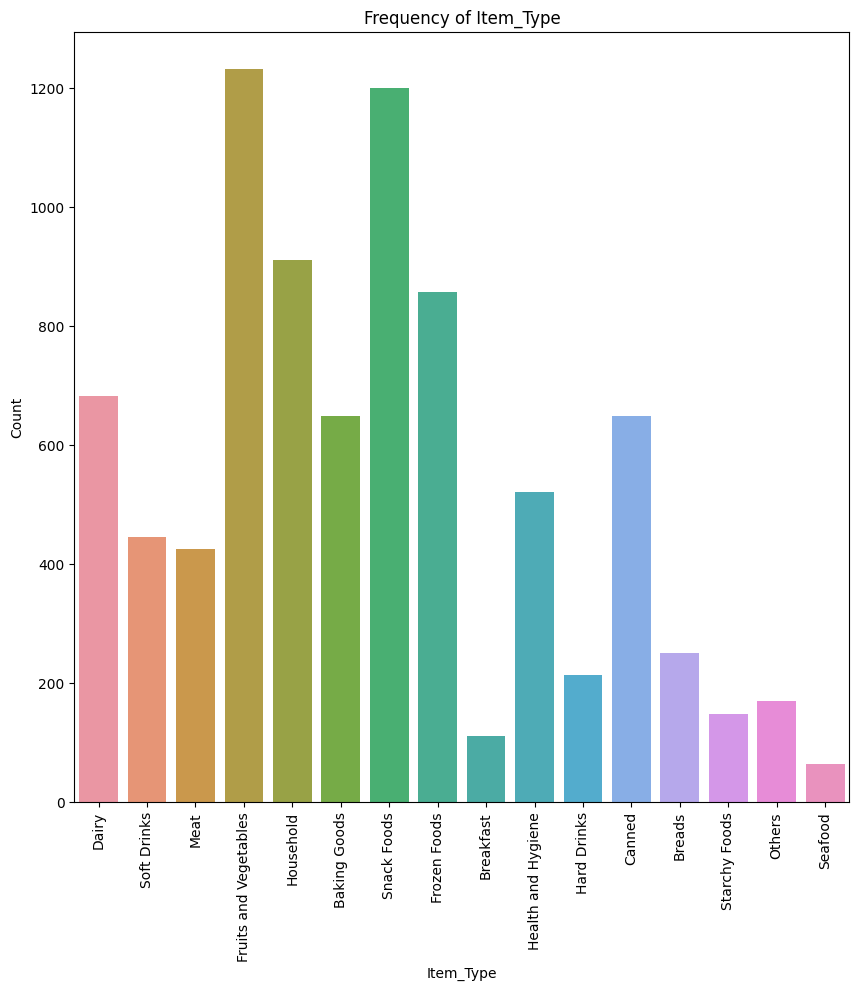

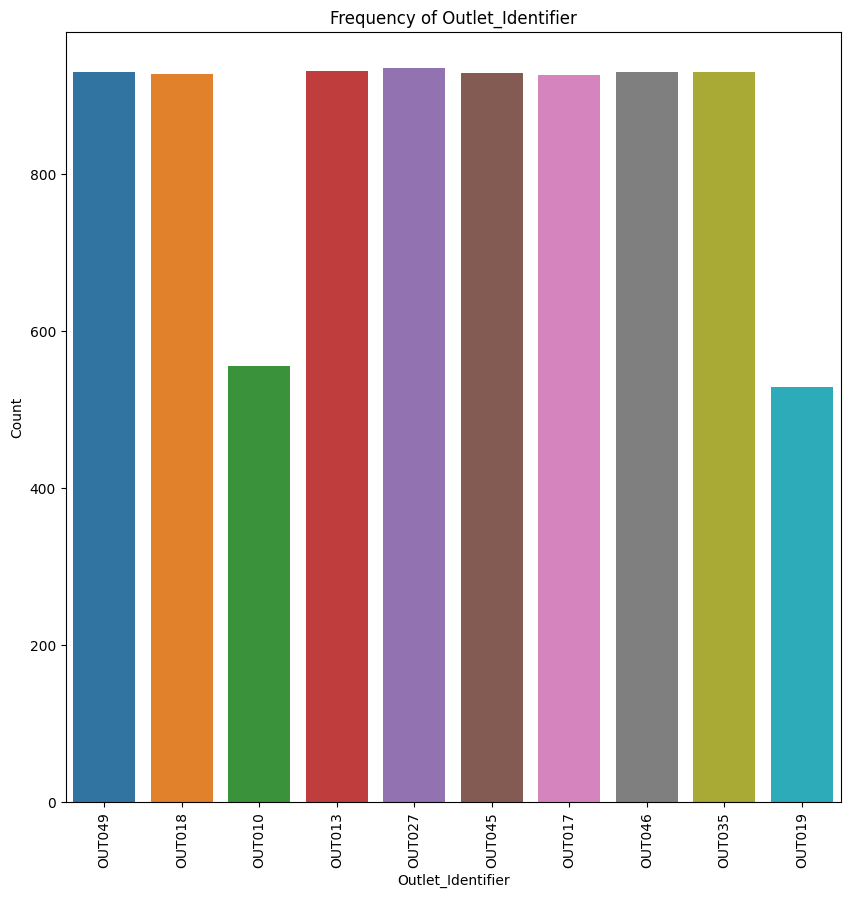

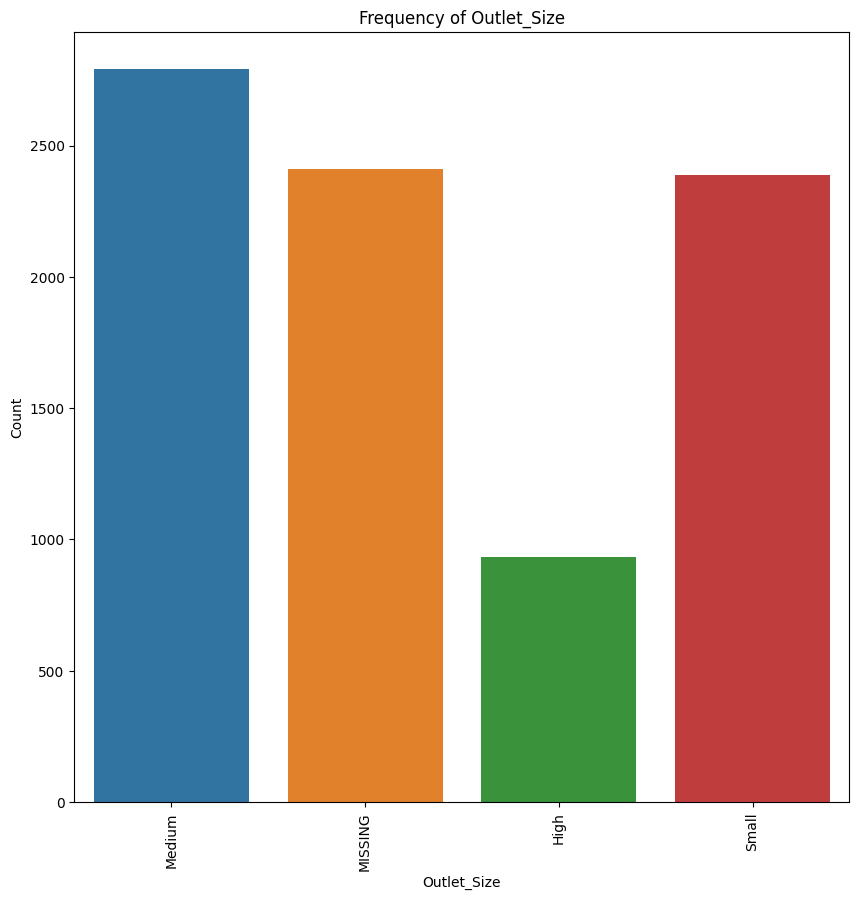

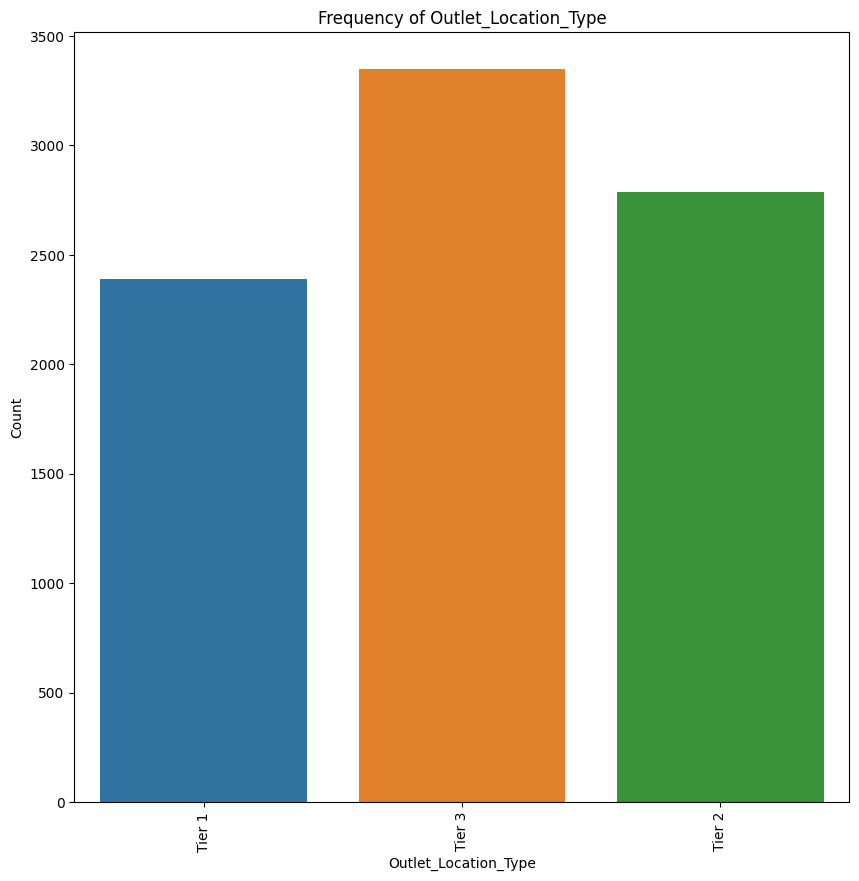

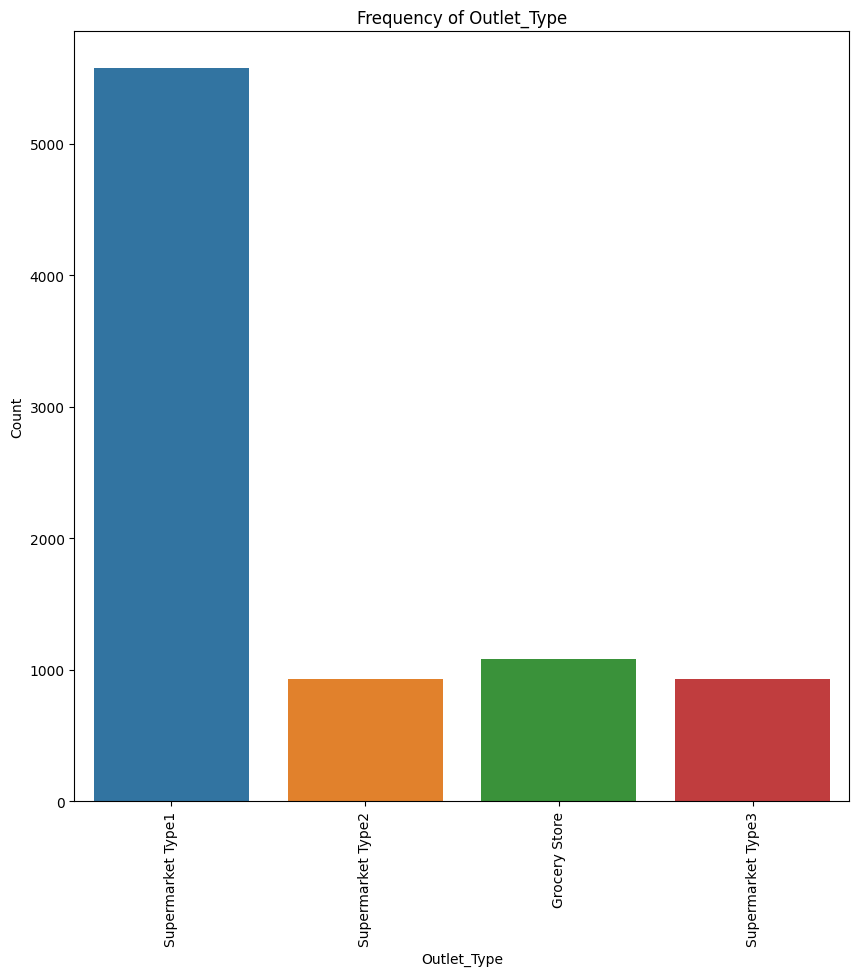

In [37]:
# Create countplots to view the frequency of each class of categorical features in the dataset
for feature in cat_features:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=feature, data=df)
    plt.title(f"Frequency of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    print

### Create a heatmap to view the correlation between features.

In [38]:
# Get correlations for numeric columns
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


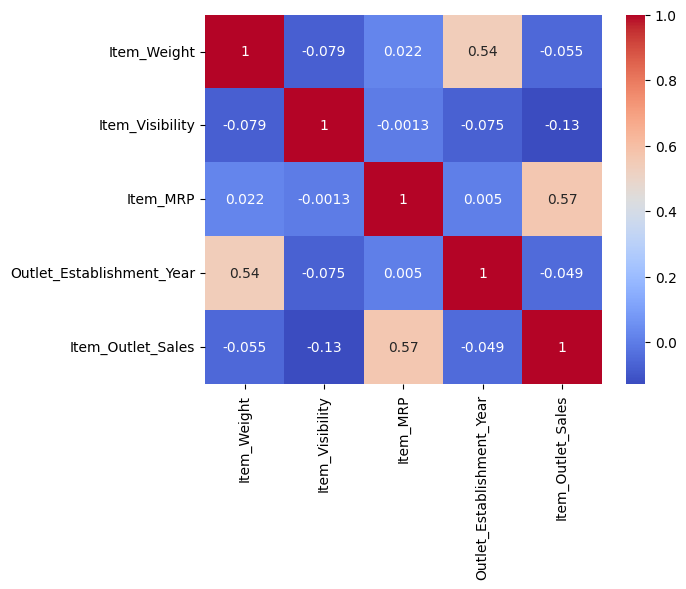

In [39]:
# Create a heatmap to view the correlation between features
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

### Feature Inspection

In [40]:
# Let's practice on Item Weight
x = 'Item_Weight'
# Before filling in the NA values with a placeholder, let's get the count and percentage
temp_df = df.copy()
# Save null values counts
null_count = temp_df[x].isna().sum()
# Calculate the percentage of null values
null_perc = null_count/len(temp_df)* 100
# Print the null value info with an f-statement
print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

- NaN's Found: 0 (0.0%)


#### Univariate EDA Functions

In [41]:
# Define a function for explore_numeric

def explore_numeric(df, x, figsize=(6,5)):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  # Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  # Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [42]:
# Define a function for explore_categorical

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

#### Multivariate Feature vs. Target Functions

In [43]:
# Define a function for plot_numeric_vs_target

def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [44]:
# Define a function for plot_categorical_vs_target

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
   # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


### Inspecting Each Feature

#### Item Identifier


- Item_Identifier:
  - Product ID  

In [45]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

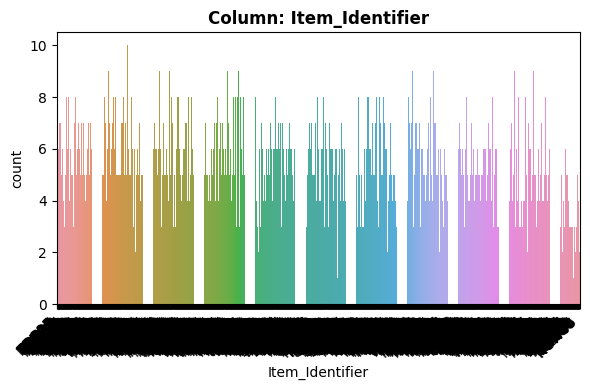

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [46]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 1559. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes. This column has a very high cardinality that could muddy up our analysis.

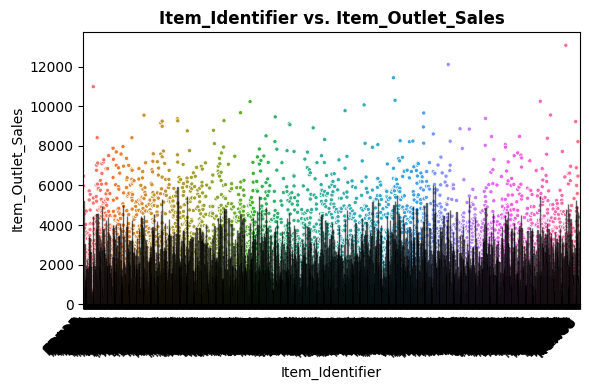

In [47]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not at all.
    
  - Does this feature appear to be a predictor of the target?
    - No, it does not.

___

#### Item Weight

- Item_Weight:
  - Weight of product
  

In [48]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

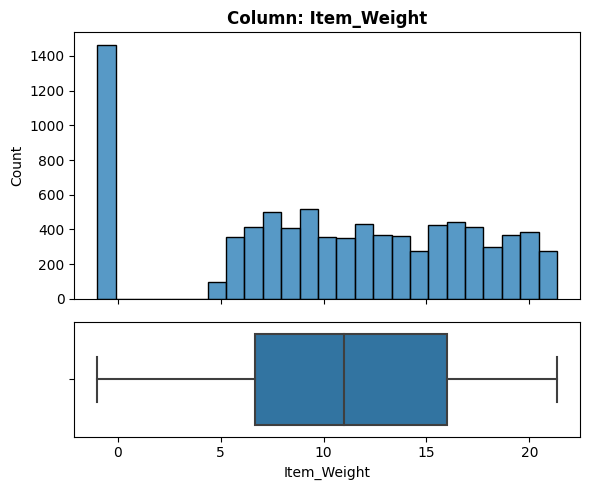

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '-1.0' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [49]:
# Run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant, nor is it quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Not in my opinion. It may still be useful for the client to know how much an item weighs so that they can make reasonable purchases of the item(s) and not have too much overstock.



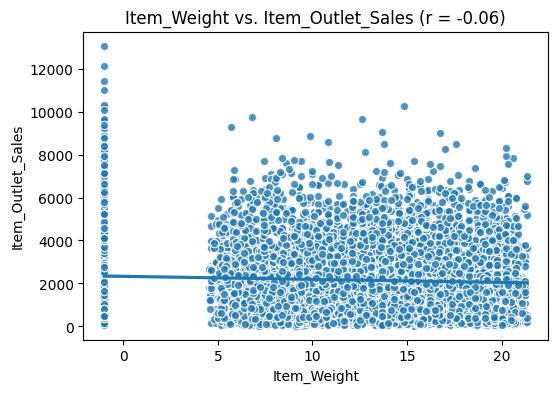

In [50]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, I would not expect this feature to be a predictor of the target.

  - Does this feature appear to be a predictor of the target?
    - No, it does not.

___

#### Item Fat Content


- Item_Fat_Content:
  - Whether the product is low-fat or regular

  

In [51]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

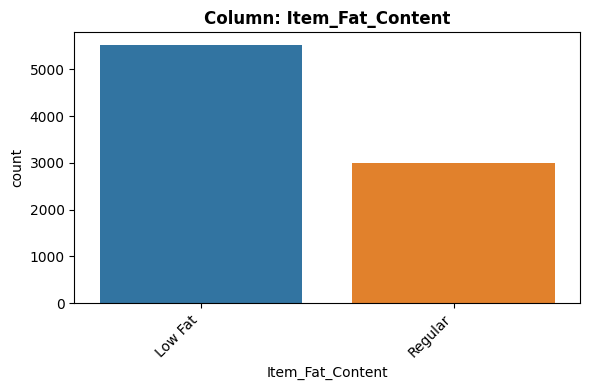

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [52]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categirical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 2. This is rather low.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



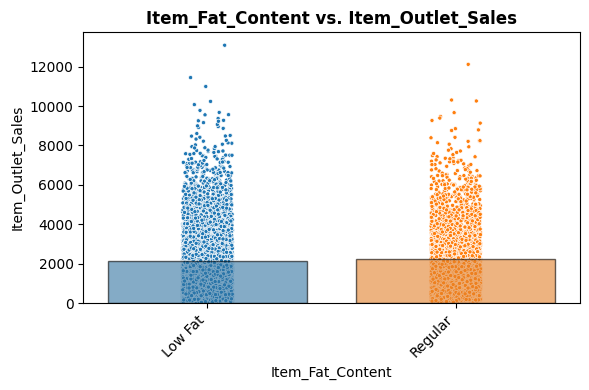

In [53]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would assume that Low Fat items would be purchased more frequently than Regular items.
    
  - Does this feature appear to be a predictor of the target?
    - Not at all.

___

#### Item Visibility

- Item_Visibility:
  - The percentage of total display area of all products in a store allocated to the particular product

In [54]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

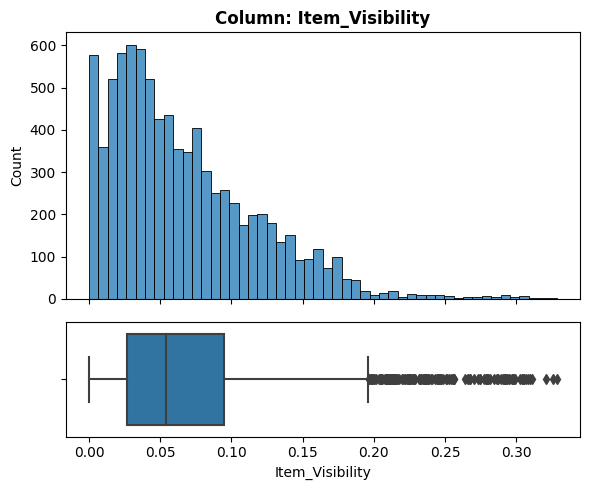

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [55]:
# Run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant, nor is it quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

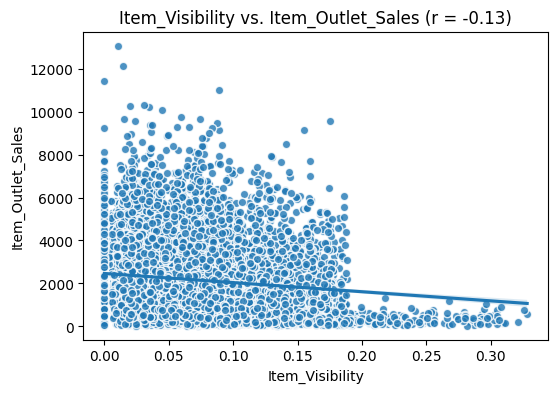

In [56]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not necessarilly. Though, I would assume that items closer to ground level would have more sales since the eye level of young children is closer to that level.
    
  - Does this feature appear to be a predictor of the target?
    - No, it does not.

___

#### Item Type


- Item_Type:
  - The category to which the product belongs


In [57]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

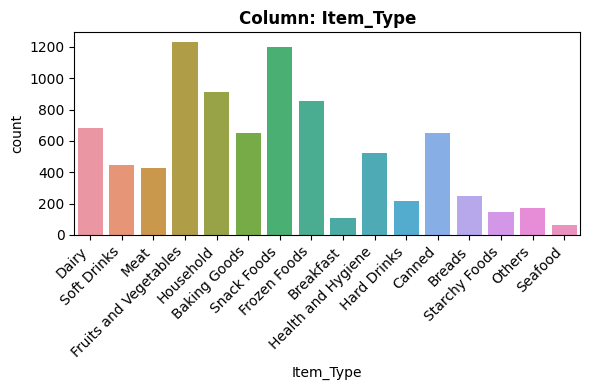

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [58]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 16. This is considered high, however it is not terribly high.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - None that I can see.



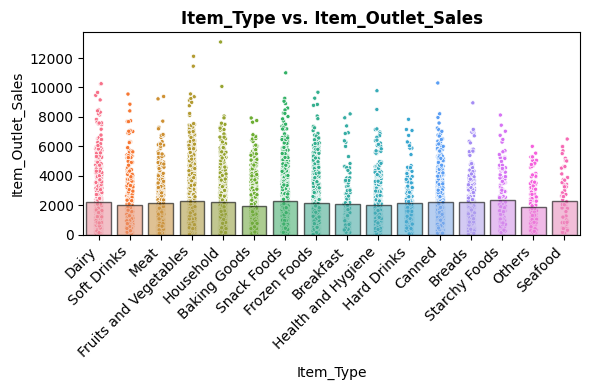

In [59]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes and no. I would have expected that some Household items or Other items could carry a higher price tag, which would increase the Item Outlet Sales.
    
  - Does this feature appear to be a predictor of the target?
    - Only slightly. Household items did in fact have higher sales. I was suprised to see that Fruits and Vegetables was just below that, and then everything else for the most part sat between the 8-10k range, with only two item types being less than 8k.

___

#### Item MRP

- Item_MRP:
  - Maximum Retail Price (list price) of the product

In [60]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

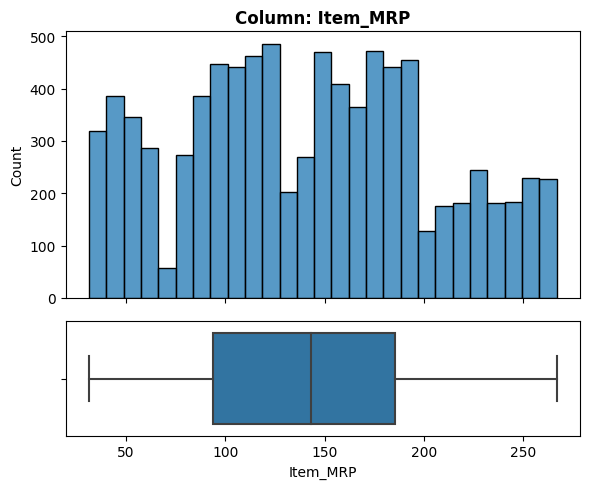

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [61]:
# Run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No. The stores would need to know the MRP of the items that they were looking into purchasing so that they could calculate overall cost prior to purchase.



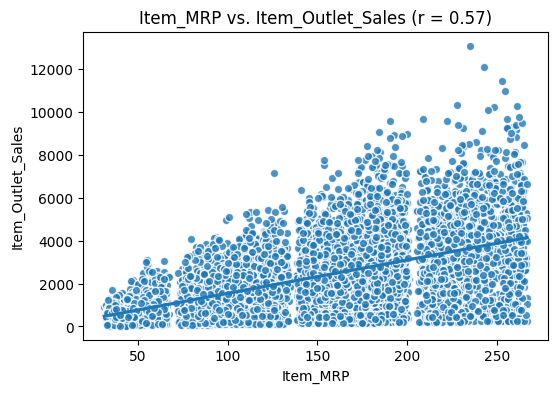

In [62]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. Higher priced items will bring in higher item outlet sales overall.
    
  - Does this feature appear to be a predictor of the target?
    - Yes! I am suprised however at the sheer amount of plots on the graph, especially in the 150-250+ range.

___

#### Outlet Identifier


- Outlet_Identifier:
  - Store ID
  

In [63]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

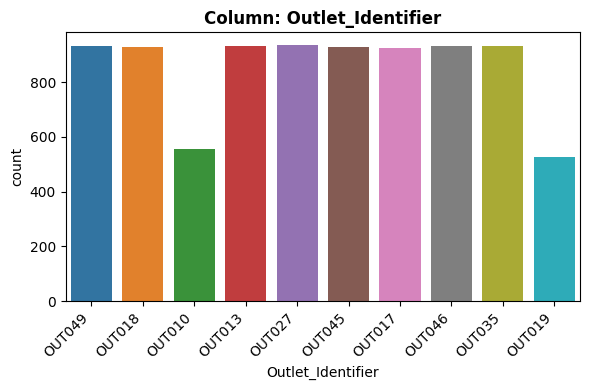

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [64]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 10. This is on the high end, however is not terribly high.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No. This information is good for the client to have so that they know which outlet is most profitable and which is not.

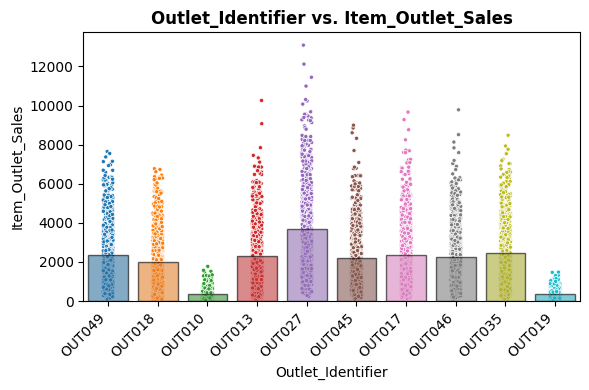

In [65]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. Outlets in densely populated areas would likely have higher item outlet sales since more people would be going to them, whereas the opposite would happen for areas that are not densely populated.
    
  - Does this feature appear to be a predictor of the target?
    - Yes. It is as I suspected in that some outlets have higher overall item outlet sales than others.

___

#### Outlet Establishment Year


- Outlet_Establishment_Year:
  - The year in which store was established

  

In [66]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

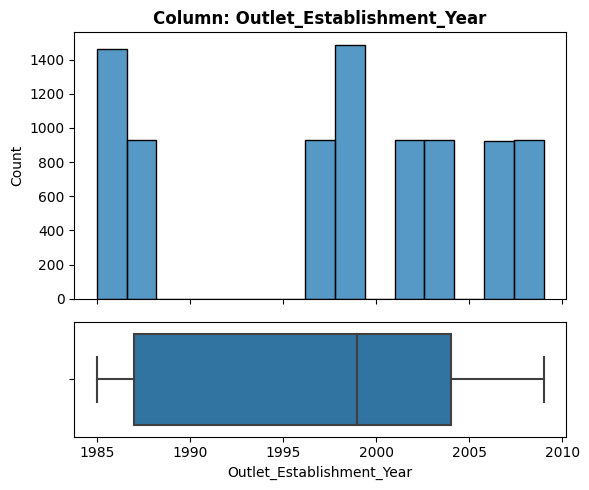

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [67]:
# Run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this feature is numeric.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - I do not believe that the outlet establishment year is necessarilly something that would be a predictor of higher item outlet sales, so I feel that it would be safe to remove the column from the dataset.



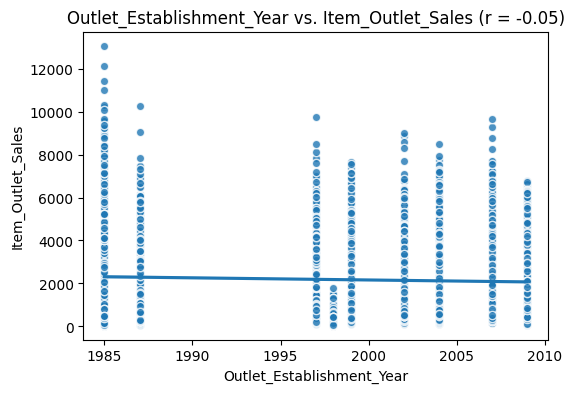

In [68]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I expect that there will not be much of a correlation between outlet establishment year and item outlet sales.
    
  - Does this feature appear to be a predictor of the target?
    - No.

___

#### Outlet Size

- Outlet_Size:
  - The size of the store in terms of ground area covered

  

In [69]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

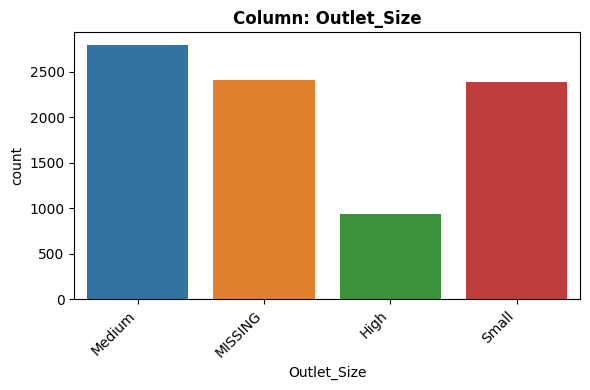

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [70]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (categorical).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 4. This is low.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - None that I can think of.



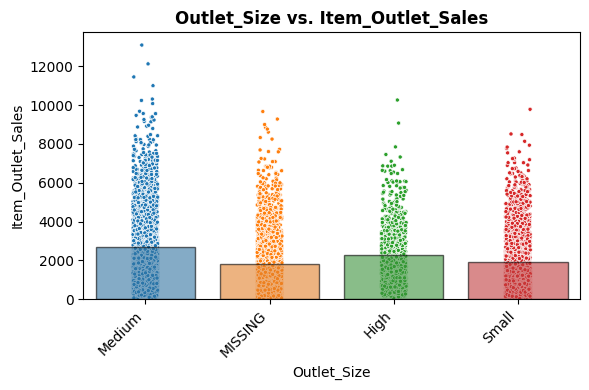

In [71]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would not expect this feature to be a predictor of the target.
    
  - Does this feature appear to be a predictor of the target?
    - Not by much. All of the outlet sizes appear to be within 2k of eachother in regards to item outlet sales.

___

#### Outlet Location Type


- Outlet_Location_Type:
  - The type of area in which the store is located
  

In [72]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

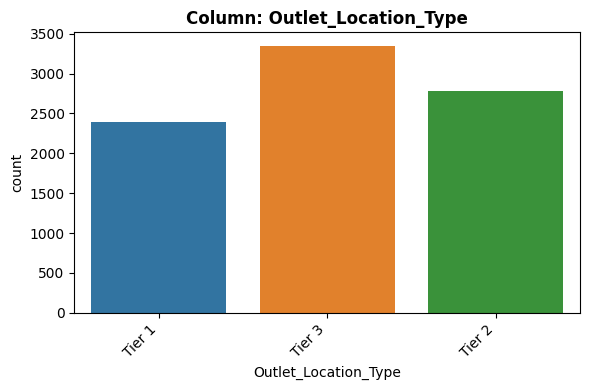

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [73]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (categorical).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 3. This is quite low.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



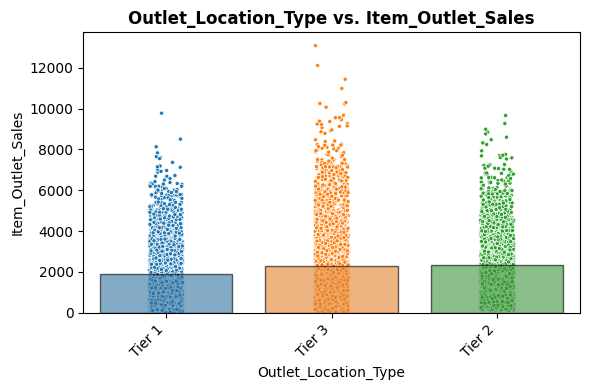

In [74]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Only slightly. I think it is safe to assume that the tiers likely represent whether the outlet is in the suburbs, city, or country.
    
  - Does this feature appear to be a predictor of the target?
    - Yes, but only slightly. The tiers are also within 2k of eachother in regards to item outlet sales.

___

#### Outlet Type

- Outlet_Type:
  - Whether the outlet is a grocery store or some sort of supermarket
  

In [75]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

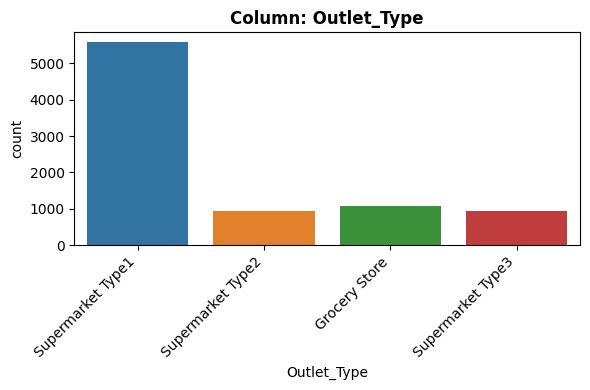

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [76]:
# Run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  -  This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 4. This is neither high or low, it's in the mid-level.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, but we would need to know more about what each outlet type is specifically, so that we could further determine if this information is correlated to higher item outlet sales.



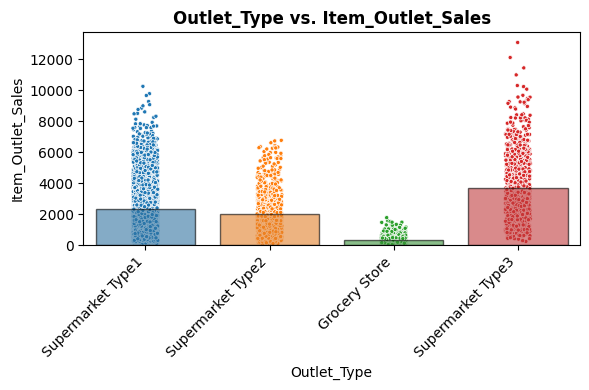

In [77]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I wouldn't have thought this this feature would be a predictor of the target.
    
  - Does this feature appear to be a predictor of the target?
    - Yes. Perhaps this could mean that one type of outlet type is closer to strip malls or outlet malls, so it sees higher foot trafic on a daily basis and thus gets more customers.

___

#### Item Outlet Sales

- Item Outlet Sales:
  - Sales of the product in the particular store. This is the target variable to be predicted.

  

In [78]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

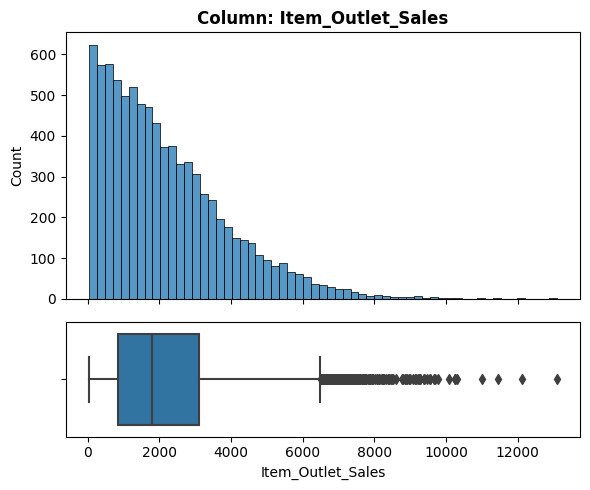

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [79]:
# Run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  -  This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No. This data shows us that the higher a price tag is on an item, the less likely that item will be sold. Whereas on the other side of the spectrum, lesser priced items would sell more since those are more within the everyday individuals financial means.



# Phase 3) Data Preparation

##Separate Data Into Feature Matrix (X) and Target Vector (y)

In [80]:
# Target vector (y)
y = df['Item_Outlet_Sales']
# Features matrix (X)
X = df.drop(columns = ['Item_Outlet_Sales'])

##Train Test Split

In [81]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Define Lists & Create Pipelines and Tuples for Each Group of Columns

###Numeric Columns

In [82]:
# Save list of Numeric Column Names
num_cols = X_train.select_dtypes("number").columns
# Numeric Transformers
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Create Numeric Pipeline
num_pipeline = make_pipeline(impute_mean, scaler)
# Numeric Tuple
num_tuple = ('numeric', num_pipeline, num_cols)

###Ordinal Columns

In [83]:
# Save list of Ordinal Column Names
ord_col = ['Outlet_Location_Type']
# Specifying the order of categories in quality/condition columns
qual_cond_order = ['Tier 1', 'Tier 2', 'Tier 3']
# Making the list of order lists for OrdinalEncoder
ordinal_category_order = [qual_cond_order]
# Ordinal Transformers
ord_encoder = OrdinalEncoder(categories=ordinal_category_order)
freq_imputer = SimpleImputer(strategy='most_frequent')
# Ordinal Scaler
scaler_ord = StandardScaler()
# Create Ordinal Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord_encoder, scaler_ord)
# Ordinal Tuple
ord_tuple = ('ordinal', ord_pipeline, ord_col)

###Categorical (Nominal) Columns

In [84]:
# Save a list of Categorical COlumn Names
cat_cols = X_train.select_dtypes("object").columns.drop(ord_col).drop('Item_Identifier')
# Categorical Transformers
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
# Create Categorical Pipeline
cat_pipeline = make_pipeline(impute_na, onehot_encoder)
# Categorical Tuple
ohe_tuple = ('categorical', cat_pipeline, cat_cols)

## Create Column Transformer to Apply Different Preprocessing to Different Columns

In [85]:
# Create the ColumnTransformer to Apply the Appropriate Preprocessing to Each Column
col_transformer = ColumnTransformer([num_tuple,
                                     ord_tuple,
                                     ohe_tuple],
                                    remainder='drop', verbose_feature_names_out=False)

In [86]:
# Fit the Column Transformer on the Training Data
col_transformer.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [87]:
# Transform the Training and Test Data Using the Fitted Pipeline
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

## Check the Results

In [88]:
# Display the information and details for X_train
display(X_train_processed.head())
display(X_train_processed.describe())
display(X_train_processed.info())
# Check the shape
print(f'\nShape of processed data is: {X_train_processed.shape}')
# Check for remaining missing values
print(f'\nThere are {X_train_processed.isna().sum().sum()} missing values')
# Check the data types
print(f'\nThe datatypes are {X_train_processed.dtypes}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.868187,-0.712775,1.828109,1.327849,1.084948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.705038,-1.291052,0.603369,1.327849,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,0.274919,1.813319,0.244541,0.136187,-1.384777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-0.373968,-1.004931,-0.952591,0.732018,-0.149914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4810,1.313138,-0.965484,-0.336460,0.493686,-0.149914,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.00000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,-4.446450e-17,-6.169450e-17,4.668773e-17,-4.250806e-15,9.337545e-17,0.354036,0.027378,0.013141,0.075250,0.079318,0.098874,0.148310,0.026439,0.061014,0.108730,0.047247,0.020338,0.006571,0.14174,0.051783,0.019086,0.107791,0.109199,0.110138,0.060075,0.113110,0.110920,0.109355,0.108730,0.105757,0.283479,0.329005,0.279725,0.651752,0.110138,0.113110
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,0.478258,0.163195,0.113889,0.263815,0.270255,0.298516,0.355435,0.160450,0.239374,0.311324,0.212182,0.141164,0.080800,0.34881,0.221607,0.136839,0.310141,0.311913,0.313086,0.237645,0.316752,0.314057,0.312109,0.311324,0.307551,0.450722,0.469889,0.448899,0.476452,0.313086,0.316752
min,-1.705114e+00,-1.291052e+00,-1.767529e+00,-1.532139e+00,-1.384777e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.675221e-01,-7.624234e-01,-7.638272e-01,-1.293807e+00,-1.384777e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.952253e-02,-2.318711e-01,3.400912e-02,1.361872e-01,-1.499144e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.311079e-01,5.596016e-01,7.172910e-01,7.320181e-01,1.084948e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.609772e+00,5.132050e+00,1.994559e+00,1.327849e+00,1.084948e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Outlet_Establishment_Year        6392 non-null   float64
 4   Outlet_Location_Type             6392 non-null   float64
 5   Item_Fat_Content_Regular         6392 non-null   float64
 6   Item_Type_Breads                 6392 non-null   float64
 7   Item_Type_Breakfast              6392 non-null   float64
 8   Item_Type_Canned                 6392 non-null   float64
 9   Item_Type_Dairy                  6392 non-null   float64
 10  Item_Type_Frozen Foods           6392 non-null   float64
 11  Item_Type_Fruits and Vegetables  6392 non-null   float64
 12  Item_Type_Hard Dr

None


Shape of processed data is: (6392, 36)

There are 0 missing values

The datatypes are Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Outlet_Location_Type               float64
Item_Fat_Content_Regular           float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Starchy Foods            float64
Outlet_Ide

# Phase 4) Modeling

In [89]:
# Import Modeling Tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [90]:
# Define EDA Functions

def regression_metrics(y_true, y_pred, label='', verbose = True,
                       output_dict=False, model_name=''):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics


def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False, model_name=''):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

## Baseline Dummy Model

In [91]:
# Creaing and fitting baseline dummy model
dummy = DummyRegressor(strategy='mean')
dummy_pipe = make_pipeline(col_transformer, dummy)
dummy_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                  ['Outlet_Location_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [92]:
# Display the model's metrics
dummy_metrics = evaluate_regression(dummy_pipe, X_train, y_train, X_test, y_test)
dummy_metrics

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 1,360.218
- MSE = 2,959,455.705
- RMSE = 1,720.307
- R^2 = 0.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 1,326.121
- MSE = 2,772,144.463
- RMSE = 1,664.976
- R^2 = -0.005


## Linear Regression Model

In [93]:
# Creating and fitting linear regression model
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(col_transformer, lin_reg)
lin_reg_pipe.fit(X_train, y_train);
evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.109
- MSE = 1,297,591.451
- RMSE = 1,139.119
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 803.959
- MSE = 1,194,124.946
- RMSE = 1,092.760
- R^2 = 0.567


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
# Display model performance metrics using a function
lin_reg_metrics = evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test,
                                        verbose = True, output_frame = True,
                                        model_name = 'Linear Regression Model')
lin_reg_metrics

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.109
- MSE = 1,297,591.451
- RMSE = 1,139.119
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 803.959
- MSE = 1,194,124.946
- RMSE = 1,092.760
- R^2 = 0.567


,MAE,MSE,RMSE,R^2
Training Data,847.109,1297591.451,1139.119,0.562
Test Data,803.959,1194124.946,1092.760,0.567


### To what extent is this model overfit/underfit?
- With an R^2 of 0.562 for the training data and 0.567 for the test data, this model is exhibiting **underfitting**. This indicates that this model is not flexible enough or complex enough to fully capture the underlying patterns in the data, since it can only explain around 57% of the variance in the target.

## Random Forest Model

In [95]:
# Creating and fitting the random forest model
rand_fore = RandomForestRegressor(random_state=42)
rand_fore_pipe = make_pipeline(col_transformer, rand_fore)
rand_fore_pipe.fit(X_train, y_train);
evaluate_regression(rand_fore_pipe, X_train, y_train, X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.367
- MSE = 184,048.635
- RMSE = 429.009
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 774.854
- MSE = 1,234,371.034
- RMSE = 1,111.023
- R^2 = 0.553


In [96]:
# Display model performance metrics using a function
rand_fore_metrics = evaluate_regression(rand_fore_pipe, X_train, y_train, X_test, y_test,
                                        verbose = True, output_frame = True,
                                        model_name = 'Random Forest Model')
rand_fore_metrics

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.367
- MSE = 184,048.635
- RMSE = 429.009
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 774.854
- MSE = 1,234,371.034
- RMSE = 1,111.023
- R^2 = 0.553


,MAE,MSE,RMSE,R^2
Training Data,297.367,184048.635,429.009,0.938
Test Data,774.854,1234371.034,1111.023,0.553


### To what extent is this model overfit/underfit?
- The model's R^2 of 0.938 on the training data and 0.553 on the testing data indicates **overfitting**. The model exhibits a notable difference in performance between the training and testing datasets, with considerably better results on the training data compared to the testing data.

### Linear Regression vs. Random Forest

In [97]:
# Concatenate metrics to metrics dataframe
metrics = pd.concat([lin_reg_metrics, rand_fore_metrics]).round(2)
metrics

,MAE,MSE,RMSE,R^2
Training Data,847.11,1297591.45,1139.12,0.56
Test Data,803.96,1194124.95,1092.76,0.57
Training Data,297.37,184048.64,429.01,0.94
Test Data,774.85,1234371.03,1111.02,0.55


_______________________________________________________

###Tune Random Forest Model with GridSearchCV

In [98]:
# Parameters for tuning
rand_fore_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                    ('standardscaler',
                              

In [99]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [100]:
# Instantiate the gridsearch
rand_fore_gs = GridSearchCV(rand_fore_pipe, params, n_jobs=-1, verbose=1)
# Fit the gridsearch on training data
rand_fore_gs.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strat...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [101]:
# Obtain best parameters
rand_fore_gs.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__n_estimators': 150,
 'randomforestregressor__oob_score': True}

In [102]:
# Define and refit best model
best_rand_fore = rand_fore_gs.best_estimator_
best_rand_fore

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, max_features=None,
                                       min_samples_leaf=4, n_estimators=150,
                                       oob_score=True, random_state=42))])

In [103]:
# Use custom function to evaluate model
best_rand_fore_metrics = evaluate_regression(best_rand_fore, X_train, y_train, X_test, y_test,
                                             verbose = True, output_frame = True,
                                             model_name = 'Best Random Forest')
best_rand_fore_metrics

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 642.719
- MSE = 841,159.513
- RMSE = 917.147
- R^2 = 0.716

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 736.800
- MSE = 1,117,672.727
- RMSE = 1,057.200
- R^2 = 0.595


,MAE,MSE,RMSE,R^2
Training Data,642.719,841159.513,917.147,0.716
Test Data,736.800,1117672.727,1057.200,0.595


In [104]:
# Concatenate metrics to metrics dataframe
metrics_gs = pd.concat([lin_reg_metrics, rand_fore_metrics, best_rand_fore_metrics]).round(2)
metrics_gs

,MAE,MSE,RMSE,R^2
Training Data,847.11,1297591.45,1139.12,0.56
Test Data,803.96,1194124.95,1092.76,0.57
Training Data,297.37,184048.64,429.01,0.94
Test Data,774.85,1234371.03,1111.02,0.55
Training Data,642.72,841159.51,917.15,0.72
Test Data,736.80,1117672.73,1057.20,0.60


____________________________________________________

# Phase 5) Evaluation

**Linear Regression Model**
- The Linear Regression Model achieved an R-Squared (R^2) value of 0.56 on the training data and 0.57 on the test data, along with Root Mean Square Error (RMSE) values of 1139.12 and 1092.76 on the training and test data, respectively. While these metrics indicate that the model is somewhat underfit to the data, it's essential to consider that both the R^2 and RMSE values are relatively close on both training and test data. This suggests that the model generalizes reasonably well to unseen data and does not suffer from severe overfitting or underfitting issues like the other models.

**Random Forest Model**
- In terms of R^2 and RMSE on the training data, the Random Forest Model performed better than the Linear Regression Model. Unfortunately, the Random Forest Model is not appropriate for this business problem because to its poor adaptability to the test data, as indicated by a much lower R^2 and a higher RMSE value. Therefore, this model is overfit.

**Random Forest Model Tuned with GridSearchCV**
-  The GridSearchCV tuned Random Forest Model improved only slightly when compared to its original version but remains overfit, with an R^2 of 0.72 and an RMSE of 917.15 on training data, as well as an R^2 of 0.60 and RMSE of 1057.20 on the test data.

# Phase 6) Deployment (Recommendations)

### Which model would you recommend to the stakeholders?

  - Considering the business problem at hand, the performance of the Linear Regression Model demonstrates a better balance between overfitting and underfitting. The model yields reasonably accurate predictions on new, unseen data, as indicated by the relatively close R^2 and RMSE values on both training and test data. In real-world scenarios where process optimization, resource allocation, and overall business performance rely on accurate predictions, such generalization is essential.
  
  - Among the available options and their corresponding performance measures, it is evident that the Linear Regression Model stands as the most practical choice for effectively addressing the business problem. While there is area for improvement in its performance, the model offers consistency and reliability in its predictions, which are crucial for data-driven decision-making processes within the organization.
  
  - Trying alternative models to determine whether they increase predicted accuracy is advised in order to improve the models' suitability and performance. This analysis will assist in evaluating various methods and selecting a model that matches the business needs. Through investigating several models and contrasting their effectiveness, we can help stakeholders make knowledgeable choices and decide on the best approach for a more accurate prediction as well as effective problem-solving. This data-driven approach ensures that the selected model offers insightful information.